# Assignment 5

This assignment has two parts. In the first part, you will apply the unsupervised learning techniques we discussed in class (dimensionality reduction and clustering) to understand patterns of health inequality in the United States. In the second part, you will apply algorithmic fairness techniques to study a widely used criminal risk prediction algorithm. 

## Part 1: Unsupervised learning

1. The data we will be using comes from a paper entitled "The association between income and life expectancy in the United States, 2001-2014" (Chetty et al, JAMA 2016). You can download this paper [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4866586/pdf/nihms783419.pdf). Read the abstract and, in a few sentences, summarize the data it uses and the main conclusions it draws. (5 points)

For the data, the authors used income data by analyzing 1.4 billion deidentified tax records between 1999 and 2014 and obtained Mortality data from the Social Security Administration death records. After reading the abstract, the research yielded four results. First of all, the life expectancy of an individual increases with their income. The age gap between the richest and poorest 1% people is 14.6 years for men, and 10.1 years for women. Secondly, the inequalities in life expectancies increased the past 13 years. In general, life expectancy increased 2.34 years for men and 2.91 years for women in the top 5% of the income distribution, but only rose  only 0.32 years for men and 0.04 years for women in the bottom 5%. The third observation is that life expectancy varied approximatly 4.5 years higher locally in the poorest areas and in richer areas. This range was between 2 and 4 years across areas. And finally, geographic differences in the lowest income 25% were correlated with smoking, but were not correlated with access to medical care, physical environmental factors, income inequality, or labor market conditions. However, the life expectancy for low income individuals was correlated with the fraction of immigrants in the local area, fraction of college graduates, and local government spendings.

2. As part of their paper, the authors released numerous aggregated datasets (yay!).  We will be using a dataset (health_ineq_online_table_12) which provides health and inequality metrics for each county. Because there are dozens of metrics, we would like to summarize them in some more compact way using unsupervised learning techniques. 

Please note that there are many missing values in the dataset. So we need to use the mean values to replace them. 

Let's start by preprocessing our dataset.

In [150]:
# Author: Daan van der Zwaag (dv239@cornell.edu)
# Date: 11/29/21
# Context: INFO 5430 Urban Data (2021FA) - Assignment 5 
# Lecturer: E. Pierson


# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


a. Remove all columns prior to cur_smoke_q1. Explain why it makes sense to exclude these columns. Then, remove all columns with at least 20% missing values. For the remaining columns, replace missing data in the column with the mean value in the column. Finally, normalize the dataset. Subtract the mean of each column and divide by its standard deviation so it will have mean zero and standard deviation 1 (10 points)

In [151]:
# loading dataset and set to dataframe
df = pd.read_csv("./processed_data_for_students/health_ineq_online_table_12.csv")

# print dataset size
print(df.shape)

(3138, 76)


In [152]:
# print all columns to indentify names

print(df.columns)

Index(['cty', 'county_name', 'cty_pop2000', 'cz', 'cz_name', 'cz_pop2000',
       'statename', 'state_id', 'stateabbrv', 'csa', 'csa_name', 'cbsa',
       'cbsa_name', 'intersects_msa', 'cur_smoke_q1', 'cur_smoke_q2',
       'cur_smoke_q3', 'cur_smoke_q4', 'bmi_obese_q1', 'bmi_obese_q2',
       'bmi_obese_q3', 'bmi_obese_q4', 'exercise_any_q1', 'exercise_any_q2',
       'exercise_any_q3', 'exercise_any_q4', 'puninsured2010',
       'reimb_penroll_adj10', 'mort_30day_hosp_z', 'adjmortmeas_amiall30day',
       'adjmortmeas_chfall30day', 'adjmortmeas_pnall30day', 'med_prev_qual_z',
       'primcarevis_10', 'diab_hemotest_10', 'diab_eyeexam_10',
       'diab_lipids_10', 'mammogram_10', 'amb_disch_per1000_10',
       'cs00_seg_inc', 'cs00_seg_inc_pov25', 'cs00_seg_inc_aff75',
       'cs_race_theil_2000', 'gini99', 'poor_share', 'inc_share_1perc',
       'frac_middleclass', 'scap_ski90pcm', 'rel_tot', 'cs_frac_black',
       'cs_frac_hisp', 'unemp_rate', 'pop_d_2000_1980', 'lf_d_2000_1980',


In [153]:
# remove all columns prior to cur_smok_q1

columns_prior_cur_smoke_q1 = df.loc[:, :"intersects_msa"]

df = df.drop(columns_prior_cur_smoke_q1, axis=1)

# print dataset size 
print(df.shape)


(3138, 62)


In [154]:
# remove columns with at least 20% missing values
# source: https://stackoverflow.com/questions/37921703/how-to-delete-columns-with-at-least-20-missing-values

df = df.dropna(thresh=0.8*len(df), axis=1)

# print dataset size
print(df.shape)

(3138, 47)


In [155]:
# replace missing data in the column with the mean value in the column

df = df.fillna(df.mean())

# print dataset size
print(df.shape)

(3138, 47)


In [156]:
# Describe dataset before normalizing

df.describe()

,puninsured2010,reimb_penroll_adj10,mort_30day_hosp_z,adjmortmeas_amiall30day,adjmortmeas_chfall30day,adjmortmeas_pnall30day,med_prev_qual_z,primcarevis_10,diab_hemotest_10,diab_eyeexam_10,...,ccd_exp_tot,ccd_pup_tch_ratio,score_r,cs_educ_ba,e_rank_b,cs_fam_wkidsinglemom,crime_total,subcty_exp_pc,taxrate,tax_st_diff_top20
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,...,3138.000000,3138.000000,3.138000e+03,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,18.517970,9281.612312,0.457138,0.165429,0.109055,0.123564,-0.153162,80.753656,83.636878,66.024303,...,6.142369,16.382494,-1.168662e-08,16.527670,47.327167,0.194685,0.005761,2158.017177,0.023379,0.769308
std,5.581009,1608.002090,1.208073,0.039636,0.023620,0.026596,0.852552,7.542990,6.668567,7.582338,...,2.185068,2.581067,9.012540e+00,7.792996,5.816278,0.067744,0.003733,1459.280445,0.020935,1.465255
min,3.625483,3663.530000,-7.778000,0.000000,0.000000,0.000000,-4.853847,18.331749,16.911765,22.222222,...,3.032457,4.900000,-3.868714e+01,4.900000,23.171790,0.024793,0.000000,0.000000,0.000000,0.000000
25%,14.433552,8147.875000,-0.254638,0.145290,0.096371,0.109823,-0.594211,78.699313,81.132075,61.358381,...,5.037605,14.914097,-4.933979e+00,11.225000,43.623965,0.152643,0.003199,1511.085000,0.014992,0.000000
50%,18.183575,9182.695000,0.404707,0.162744,0.107324,0.122391,-0.131926,82.130774,84.663440,66.024303,...,5.816569,16.382494,5.851460e-01,14.500000,47.327167,0.182498,0.005482,1938.982500,0.020338,0.000000
75%,21.996643,10271.020000,1.144452,0.183301,0.120178,0.136439,0.416656,84.933884,87.615547,70.751506,...,6.744836,17.791334,5.867197e+00,19.300000,50.494937,0.221579,0.007693,2513.926750,0.027166,1.000000
max,41.366290,18443.220000,8.472745,0.444663,0.344451,0.634090,3.478521,95.665079,100.000000,90.000000,...,53.258174,33.845817,3.298522e+01,63.700000,68.323950,0.543878,0.047191,56771.870000,0.899655,7.220000


In [157]:
# Normalizing the dataset. Subtracting the mean of each column and divide by its standard deviation 
# source: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

df_normalized = (df-df.mean())/df.std()

# sanity check: the output will have mean zero and standard deviation 1 (round to 1 decimal)

df_normalized.describe().round()

,puninsured2010,reimb_penroll_adj10,mort_30day_hosp_z,adjmortmeas_amiall30day,adjmortmeas_chfall30day,adjmortmeas_pnall30day,med_prev_qual_z,primcarevis_10,diab_hemotest_10,diab_eyeexam_10,...,ccd_exp_tot,ccd_pup_tch_ratio,score_r,cs_educ_ba,e_rank_b,cs_fam_wkidsinglemom,crime_total,subcty_exp_pc,taxrate,tax_st_diff_top20
count,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,...,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0,3138.0
mean,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-3.0,-7.0,-4.0,-5.0,-5.0,-6.0,-8.0,-10.0,-6.0,...,-1.0,-4.0,-4.0,-1.0,-4.0,-3.0,-2.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
75%,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
max,4.0,6.0,7.0,7.0,10.0,19.0,4.0,2.0,2.0,3.0,...,22.0,7.0,4.0,6.0,4.0,5.0,11.0,37.0,42.0,4.0



b. In a couple sentences, explain why it is important to put columns in this dataset on the same scale by dividing by the standard deviation before applying k-means or PCA. How much does the standard deviation of columns vary prior to standardizing them? (10 points)

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

3. Apply PCA to the standardized dataset using sklearn. Print out how much variance is explained by each of the first 10 PCA dimensions, and the total fraction of variance explained. Write a couple sentences interpreting your results. (8 points)

In [158]:
# import PCA from sklearn
from sklearn.decomposition import PCA

# set PCA with first 10 dimensions
pca = PCA(n_components=10)

# fit to normalized df
pca.fit(df_normalized)

PCA(n_components=10)

In [159]:
# print variance of first 10 pca dimensions

variances = pca.explained_variance_ratio_

print("Variances of the first", variances.size, "PCA Dimensions:", variances)

Variances of the first 10 PCA Dimensions: [0.16840755 0.15682395 0.07454076 0.0636707  0.04788578 0.04278994
 0.03698041 0.03250323 0.02949953 0.02836063]


In [160]:
print("Sum of Variances of the first", variances.size, "PCA Dimensions:", variances.sum().round(2))

Sum of Variances of the first 10 PCA Dimensions: 0.68


We see that with the first 10 PCA dimension fraction, the variances cover over 68% percent of the dataset. This is a decent result for just having the first 10 columns. For example, we see if we use more 50% more variances (15) the total sum of fractions is 0.78 which increased only with with 10 compared to the intial variances (10). So one could conclude, that having 10 PCA dimensions is enough for further research to later optimize the speed of any machine learning or other CPU heavy data analysis.

4. Plot the projection of each county using the first 2 PCA dimensions (ie, make a two-dimensional plot where each point is one county). Comment on any patterns you observe. (5 points)

In [161]:
# transform pca to model

df_transformed = pca.transform(df_normalized)

print(df_transformed)

[[ 2.47421907  1.00992576 -2.62808511 ... -1.02492185 -0.21738163
  -0.8482385 ]
 [ 2.50407588  1.25309077 -0.9311169  ... -0.88798899 -0.69043646
   1.34456029]
 [-1.82314687  4.34351963 -1.9832349  ... -0.18000781 -0.501506
   0.53400558]
 ...
 [-1.35302132 -1.8469148   1.44398158 ... -0.52136709  0.32887422
  -0.65836637]
 [-2.60484069 -0.77623735  3.87432619 ... -1.11773846 -0.78953979
   1.8497961 ]
 [-2.9841673  -2.1779378   2.69781403 ... -0.96037104  0.40804023
   0.32815989]]


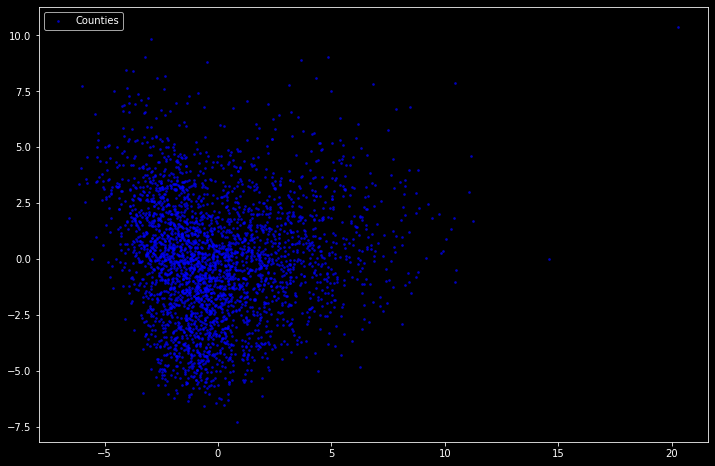

In [162]:
# define axis
pca_X = df_transformed[:, 0]
pca_Y = df_transformed[:, 1]

# figure styling
plt.figure(figsize=[12, 8])
plt.style.use('dark_background')

# figure plotting
plt.scatter(pca_X, pca_Y, label='Counties', c="blue", s=3, alpha=0.6) 

plt.legend()
plt.show()

5. Interpret the first two PCA dimensions by using the PCA component matrix (which you can get using fitted_model.components_, where fitted_model is your fitted PCA model) and looking at which of the dimensions in the original data the components correlate most strongly with (use the [codebook]('http://www.equality-of-opportunity.org/data/health/health_ineq_online_table_12_readme.pdf') to understand the meanings of different columns) (10 points)

In [163]:
# get components from fitted model
components = pca.components_

# print shape size
print(components.shape)

(10, 47)


In [164]:
# select first two PCA dimensions
selected_pca_dimensions = components[0:2, :]

# print shape size
print(selected_pca_dimensions.shape)

(2, 47)


In [165]:
# create dataframe from first two selected pca dimensions with original data column names
df_dimensions = pd.DataFrame(data=selected_pca_dimensions, columns=df.columns)

# transpose
df_dimensions = df_dimensions.T

# rename headers for legibility and string values
df_dimensions = df_dimensions.rename(columns={0: 'PCA-0', 1: 'PCA-1'})

# print 
df_dimensions

,PCA-0,PCA-1
puninsured2010,-0.134754,0.160061
reimb_penroll_adj10,-0.084506,0.164851
mort_30day_hosp_z,-0.113238,0.053824
adjmortmeas_amiall30day,-0.104669,0.041601
adjmortmeas_chfall30day,-0.055113,-0.029141
adjmortmeas_pnall30day,-0.059492,0.086189
med_prev_qual_z,0.176467,-0.162940
primcarevis_10,-0.044999,0.007168
diab_hemotest_10,0.090362,-0.136503
diab_eyeexam_10,0.122583,-0.180514


In [166]:
# sort dataframe on absolute values for PCA 0
df_dimensions.sort_values(by="PCA-0", key=abs, ascending=False)

,PCA-0,PCA-1
cs_educ_ba,0.280469,-0.040218
hhinc00,0.272392,-0.111759
median_house_value,0.270563,0.017129
cs00_seg_inc_aff75,0.266760,0.120136
cs00_seg_inc,0.258999,0.127556
cs00_seg_inc_pov25,0.230920,0.119817
mig_inflow,0.229412,0.056008
mig_outflow,0.224037,0.079264
cs_labforce,0.215275,-0.163452
pop_d_2000_1980,0.191503,0.073954


In [167]:
# sort dataframe on absolute values for PCA 1
df_dimensions.sort_values(by="PCA-1", key=abs, ascending=False)

,PCA-0,PCA-1
frac_middleclass,-0.054312,-0.288138
cs_fam_wkidsinglemom,-0.005570,0.278963
e_rank_b,-0.038496,-0.275938
scap_ski90pcm,0.006317,-0.265192
gini99,0.082365,0.250245
cs_frac_black,-0.009888,0.239254
score_r,-0.039449,-0.236752
poor_share,-0.187950,0.233477
unemp_rate,-0.118511,0.188300
diab_eyeexam_10,0.122583,-0.180514


To analyze the highest correlation from the first two PCA dimensions, we sorted the datasets on absolute values and mapped the top five most correlating variables.

**PCA-0 Top 5 highest correlations**


| Raw Variable Name  | Variable Description            | PCA-0 Value |
| ------------------ | ------------------------------- | ----------- |
| cs_educ_ba         | Percent College Grads           | 0.280470    |
| hhinc00            | Mean Household Income           | 0.272392    |
| median_house_value | Median House Value              | 0.270563    |
| cs00_seg_inc_aff75 | Segregation of Affluence (>p75) | 0.266760    |
| cs00_seg_inc       | Income Segregation              | 0.258999    |

**PCA-1 Top 5 highest correlations**

| Raw Variable Name    | Variable Description                     | PCA-1 Value |
| -------------------- | ---------------------------------------- | ----------- |
| frac_middleclass     | Fraction Middle Class (p25-p75)          | -0.288138   |
| cs_fam_wkidsinglemom | Fraction of Children with Single Mother  | 0.278963    |
| e_rank_b             | Absolute Mobility (Expected Rank at p25) | -0.275938   |
| scap_ski90pcm        | Social Capital Index                     | -0.265192   |
| gini99               | Gini Index Within Bottom 99%             | 0.250245    |


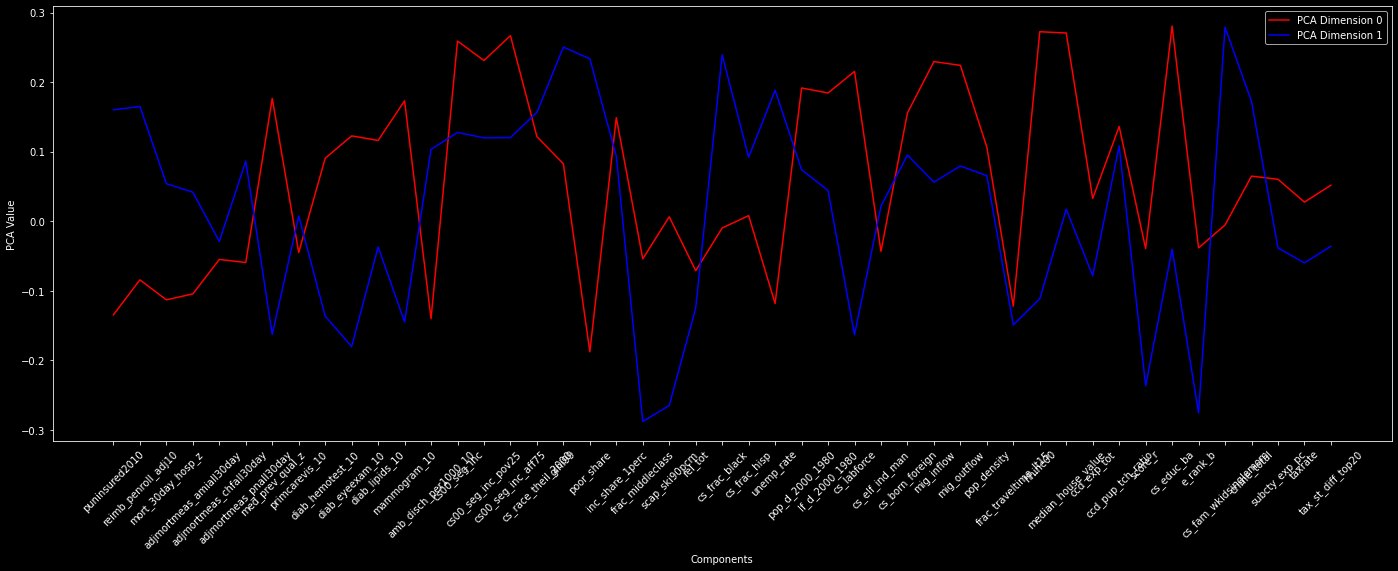

In [168]:
# (Friendly note: this is an additional graph for practise and data understanding only) Plotting the first 2 PCA dimensions

# select two dimensions
dimension_1 = selected_pca_dimensions[:, 0]
dimension_2 = selected_pca_dimensions[:, 1]

# figure styling
plt.figure(figsize=[24, 8])
plt.style.use('dark_background')


# figure plotting
plt.plot(df_dimensions["PCA-0"].T, label='PCA Dimension 0', c="red")  
plt.plot(df_dimensions["PCA-1"].T, label='PCA Dimension 1', c="blue")
plt.xticks(rotation=45)

# naming axis

plt.xlabel("Components");
plt.ylabel("PCA Value");

plt.legend()
plt.show()


6. Now let's try using k-means to cluster the data using sklearn.cluster.KMeans. We will be clustering data in the low-dimensional space (ie, using the first two PCA dimensions, not the original data). Using one of the methods discussed in the unsupervised learning lecture - for example, visual inspection, plotting the inertia, interpretability of the fitted clusters, etc - select a number of clusters (k). (We strongly suggest you use k<=5 to make it easier to interpret things.) This question is somewhat subjective, which is the point - unsupervised learning is often somewhat subjective - so write a couple sentences defending your method and choice of k. 

    Interpret the clusters by printing out the size of each cluster, and printing out cluster_centers_ as a dataframe with labeled rows and columns. To make the cluster centers dataframe easier to interpret, use df.style.background_gradient(cmap='RdBu') to color the entries of each cluster. We use the diverging colormap, RdBu, because it will use dramatic red-blue colors for both positive and negative entries, allowing us to see clusters that stand out in both directions. Write a couple sentences summarizing your findings.  (15 points)

In [169]:
from sklearn.cluster import KMeans

# set Kmeans model 
model = KMeans(n_clusters=3)

# get predictions on earlier pca dimensions dataframe
pred = model.fit_predict(df_dimensions)

# get centers 
centers = model.cluster_centers_

# get inertia
intertia = model.inertia_



In [170]:
# Method #1: table PCA's + style background

# centers to dataframe 
df_centers = pd.DataFrame(data=model.cluster_centers_)

df_centers.style.background_gradient(cmap='RdBu') 

,0,1
0,0.035925,-0.148207
1,-0.059492,0.139513
2,0.199600,0.060456


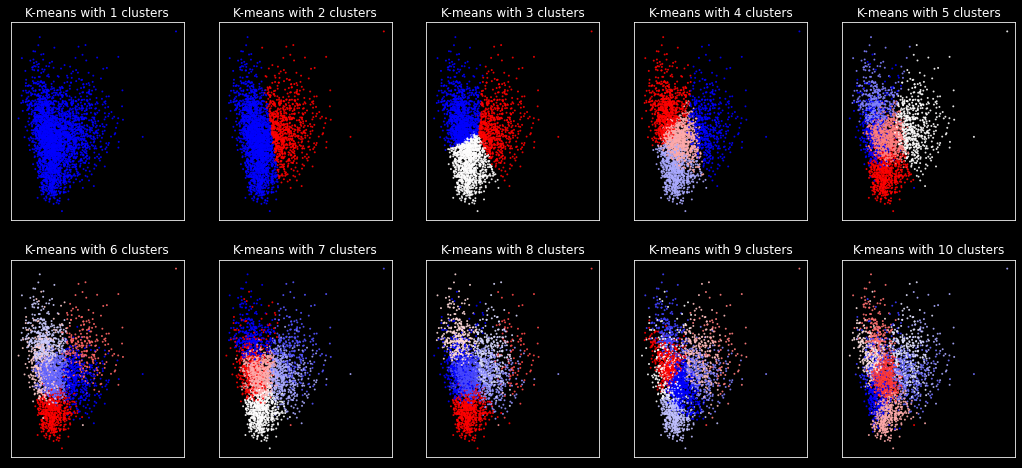

<Figure size 432x288 with 0 Axes>

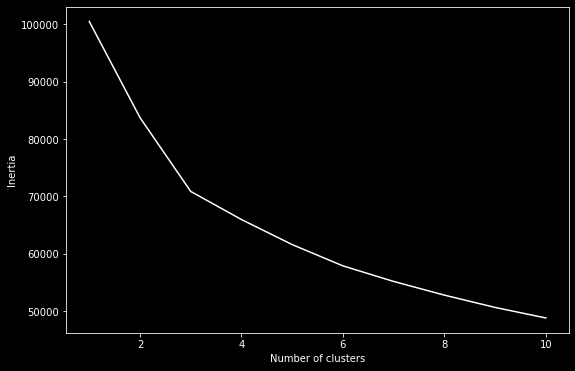

[100478.63312665198, 83728.19442321877, 70865.86884962402, 65972.38044811336, 61608.04412946488, 57900.939778683736, 55188.27412798928, 52804.60747533341, 50661.827040244, 48824.196836103496]


In [171]:
# Method #2: plotting variance in K (clusters) and inertia
# source: lecture_11_unsupervised_learning.ipynb 

inertias = []
clusters_to_test = range(1, 11)

plt.figure(figsize=[18, 8])


for n_clusters in clusters_to_test:

    modelNew = KMeans(n_clusters=n_clusters)
    predNew = modelNew.fit_predict(df_transformed) 

    inertias.append(modelNew.inertia_)

    plt.subplot(2, 5, n_clusters)
    plt.xticks([])
    plt.yticks([])

    
    # plt.scatter(pca_X, pca_Y, c=predNew)
    plt.scatter(pca_X, pca_Y, c=predNew,  s=1, alpha=0.8, cmap="bwr")

    plt.title("K-means with %i clusters" % n_clusters)
    
plt.show()

# Method #3: plot inertia graph

plt.figure()
plt.figure(figsize=[9, 6])
plt.plot(clusters_to_test, inertias, c="white")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.show()

# Method #4: calculating fraction of inertias

print(inertias)

Text(0.5, 1.0, 'K-means with three clusters')

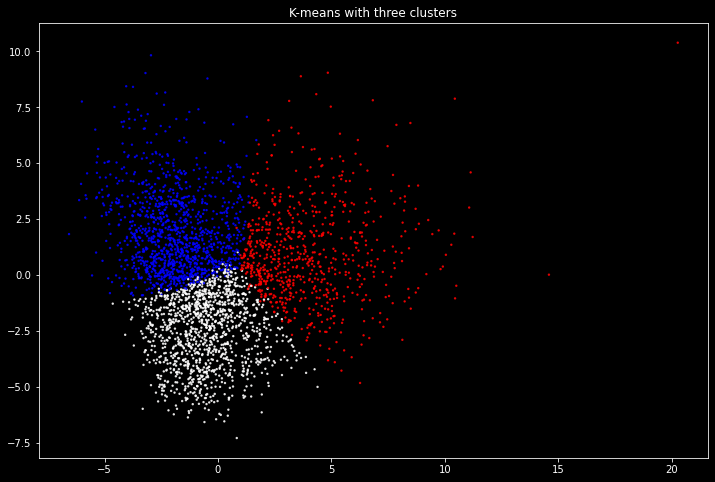

In [172]:
# final visual: cluster set on 3
pred = model.fit_predict(df_transformed)

# plot styling
plt.figure(figsize=[12, 8])
plt.style.use('dark_background')

plt.scatter(pca_X, pca_Y, c=pred, label=pred, s=2, alpha=0.8, cmap="bwr")
plt.title("K-means with three clusters")

Our choice for k=3. After trying various methods like exploring the number of clusters, plotting the inertia, and mapping the data frame, we chose three clusters in our final visualization. Our main argumentation is that the viewer can easily interpret and differentiate the three groups in the large dataset. Moreover, the unsupervised learning model already covers more than half of the inertia with three clusters (100482 maximum, 70868 for three clusters, 48670 minimum). Also, the divisions between the clusters are most sharp in clusters two and three, so here we chose the highest. Small sidenote regarding the visualization, for our colormap, we decided `bwr` instead of `RdBu` since it is also a diverging colormap, but the high saturation is more suited for dark backgrounds, which we used throughout this exercise.


## Part 2: Algorithmic fairness

This component of the assignment derives in part, with thanks and permission, from an [assignment](https://web.stanford.edu/class/cs182/assignments/AlgorithmicDecisionMaking-py.zip) in Stanford's CS182: Ethics, Public Policy, and Technological Change. Their assignment, in turn, is based on the journalistic organization ProPublica's [analysis](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) of a criminal risk prediction algorithm which we discussed in the algorithmic fairness lecture. Here, you will be assessing how a classifier designed to predict recidivism -- that is, whether someone will commit a crime in the future -- performs in terms of algorithmic fairness metrics. 

a. We have split the data for you into a train set (recidivism-training-data) and test set (recidivism-testing-data). You will be training the model on the train set and evaluating model predictions on the test set. (For simplicity, we do not use a validation set in this assignment because we will only be training a single model, so we do not need to select hyperparameters.) Read in the train set and test set, and read the data documentation in the "Algorithmic Fairness Data Documentation" file. (2 points)

In [173]:
# import regression, AUC confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# read into data
df_test = pd.read_csv('./processed_data_for_students/recidivism-testing-data.csv')
df_train = pd.read_csv('./processed_data_for_students/recidivism-training-data.csv')


b. Use the train set to train an (unregularized) logistic regression model using sklearn.linear_model.LogisticRegression with penalty="none"¶, as in the regression assignment. Use the "recidivism_outcome" column as the variable you are trying to predict, and all the rest of the features as input features. 
Please note: there is no need for "patsy" or standardization, because the data is already in one-hot form (ie, coded as ones and zeroes) and we are not using regularization. (5 points)

In [174]:
# get recidivism coutcom column
variables = df_train['recidivism_outcome']
df_train_variable = df_train.drop(['recidivism_outcome'], axis=1)

In [175]:
# set logistic regression
lr = LogisticRegression(penalty='none')

# fit model
lr.fit(df_train_variable, variables)

# predict y with lr for df_train_variable
y_train_variable_pred = lr.predict(df_train_variable)

# print predictions
print(y_train_variable_pred)

[0 1 0 ... 1 1 0]


c. Using the test set, report your model's AUC, false positive rate, false negative rate, and the fraction classified as positive, separately for white defendents and for Black defendents. In at least 5 sentences, describe what you observe, and any algorithmic fairness concerns it raises, making reference to algorithmic fairness concepts in class and using quantitative evidence as necessary. Do you believe this algorithm is fair enough to be deployed in practice? Why or why not? (15 points)

In [176]:
# describe intial test test

df_test.describe()

,Juvenile felony count = 0,Juvenile felony count = 1,Juvenile felony count = 2,Juvenile felony count >= 3,Juvenile misdemeanor count = 0,Juvenile misdemeanor count = 1,Juvenile misdemeanor count = 2,Juvenile misdemeanor count >= 3,Juvenile other offense count = 0,Juvenile other offense count = 1,...,Age > 45,Gender = Female,Gender = Male,Race = Other,Race = Asian,Race = Native American,Race = Caucasian,Race = Hispanic,Race = African American,recidivism_outcome
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,...,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,0.960259,0.026802,0.006470,0.006470,0.943161,0.041128,0.012477,0.003235,0.924214,0.057763,...,0.199168,0.190850,0.809150,0.052680,0.003235,0.002773,0.337800,0.088725,0.514787,0.446396
std,0.195396,0.161542,0.080191,0.080191,0.231589,0.198631,0.111027,0.056796,0.264716,0.233349,...,0.399467,0.393062,0.393062,0.223446,0.056796,0.052595,0.473069,0.284412,0.499897,0.497233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
# Analysis: white defendants

# filter out caucasian
df_test_white = df_test[df_test['Race = Caucasian'] == 1]


# filter out recidivism
variables_test_white = df_test_white['recidivism_outcome']
df_test_white = df_test_white.drop(['recidivism_outcome'], axis=1)

# run lr predict
y_test_pred_white = lr.predict(df_test_white)

# get auc score
aoc_white = roc_auc_score(variables_test_white, y_test_pred_white)

# print auc score 
print('White Defendants test set AUC score:', aoc_white)


White Defendants test set AUC score: 0.6631791077738516


In [178]:
# apply confusion matrix
matrix_test_white = confusion_matrix(variables_test_white, y_test_pred_white, labels=[1,0])

# print matrix
print('Confusion matrix:')
print(matrix_test_white)

Confusion matrix:
[[141 142]
 [ 77 371]]


In [179]:
# get outcome values and reshape if values not same
tp, fn, fp, tn = confusion_matrix(variables_test_white, y_test_pred_white, labels=[1,0]).reshape(-1)

# print coutomes
print("Outcome values:")
print(tp, fn, fp, tn)

Outcome values:
141 142 77 371


In [180]:
# calculate false positive rate and false negative rate
# source: https://www.split.io/glossary/false-positive-rate/

fp_rate = fp / (fp + tn)
fn_rate = fn / (fn + tp)

print('False positive rate: ', fp_rate)
print('False negative rate: ', fn_rate)


False positive rate:  0.171875
False negative rate:  0.5017667844522968


In [181]:
# calculate fraction classified as positive
# source: https://www.cuemath.com/numbers/positive-rational-numbers/

frac_class_as_positive = (tp + fp) / (tp + fp + fn + tn)
print('Fraction classified as positive: ', frac_class_as_positive)

Fraction classified as positive:  0.2982216142270862


In [182]:
# Analysis: black defendants

# filter out caucasian
df_test_black = df_test[df_test["Race = African American"] == 1]


# filter out recidivism
variables_test_black = df_test_black["recidivism_outcome"]
df_test_black = df_test_black.drop(["recidivism_outcome"], axis=1)

# run lr predict
y_test_pred_black = lr.predict(df_test_black)

# get auc score
aoc_black = roc_auc_score(variables_test_black, y_test_pred_black)

# print auc score 
print("Black Defendants test set AUC score:", aoc_black)


Black Defendants test set AUC score: 0.6564179874558617


In [183]:
# apply confusion matrix
matrix_test_black = confusion_matrix(variables_test_black, y_test_pred_black, labels=[1,0])

# print matrix
print("Confusion matrix:")
print(matrix_test_black)

Confusion matrix:
[[415 154]
 [227 318]]


In [184]:
# get outcome values and reshape if values not same
tp, fn, fp, tn = confusion_matrix(variables_test_black, y_test_pred_black, labels=[1,0]).reshape(-1)

# print coutomes
print("Outcome values:")
print(tp, fn, fp, tn)

Outcome values:
415 154 227 318


In [185]:
# calculate false positive rate and false negative rate
# source: https://www.split.io/glossary/false-positive-rate/

fp_rate = fp / (fp + tn)
fn_rate = fn / (fn + tp)

print('False positive rate: ', fp_rate)
print('False negative rate: ', fn_rate)

False positive rate:  0.41651376146788993
False negative rate:  0.27065026362038663


In [186]:
# calculate fraction classified as positive
# source: https://www.cuemath.com/numbers/positive-rational-numbers/

frac_class_as_positive = (tp + fp) / (tp + fp + fn + tn)
print('Fraction classified as positive: ', frac_class_as_positive)

Fraction classified as positive:  0.5763016157989228


Based on the data analysis, we conclude that both algoritmic fairness principles were violated. First, there is no statistical parity between Whites and Blacks. We can see that all three measurements have different rates. Second of all, there are no equal false postive rates across the groups. This means the predictive equality is not being met. We can see that Black people false postive rate is significantly higher than for the White group. In practise this could mean that Black people are more likely to labeled to commit a future crime, while that might not be true. Moreover, White people have a higher false negative rate. This means that they are often being missed in the labeling process, while later they could commit the crime. The mislabeling of Blacks, missing of Whites,and inequal rates are violating algorithmic principles


By definition we are against implementing the above algorithm, since it's not fair. However, with strong adjustments the model could have purpose. For example, by addition extra fairness priciples such as leaving out demographics which could be discriminated against, could improve the model. Besides, an alternative solution would be relying soley on people and we believe that with the power of this algorithms, if they are as unbiased as possible, they could serve a purpose in the field of justice. 

d. Now train your own model, choosing the features you believe should be used (you are also welcome to use models which are not logistic regression models). Report the model's performance on white and Black defendents, using whatever metrics you believe are appropriate (you are also welcome to evaluate performance on other sensitive/protected groups). Write two paragraphs defending your model design choices, and explaining why you designed the model the way you did. (You're welcome to write two paragraphs explaining why you don't think models should be used in criminal risk prediction at all - this is a reasonable perspective! - but you still need to provide quantitative or non-quantitative evidence to back up your claims.) (15 points)

In [187]:
# describe train dataset
df_train.describe()

,Juvenile felony count = 0,Juvenile felony count = 1,Juvenile felony count = 2,Juvenile felony count >= 3,Juvenile misdemeanor count = 0,Juvenile misdemeanor count = 1,Juvenile misdemeanor count = 2,Juvenile misdemeanor count >= 3,Juvenile other offense count = 0,Juvenile other offense count = 1,...,Age > 45,Gender = Female,Gender = Male,Race = Other,Race = Asian,Race = Native American,Race = Caucasian,Race = Hispanic,Race = African American,recidivism_outcome
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,0.961188,0.025941,0.007327,0.005545,0.942178,0.040000,0.008911,0.008911,0.928911,0.048119,...,0.204356,0.194455,0.805545,0.052079,0.004950,0.002376,0.341188,0.088119,0.511287,0.452475
std,0.193165,0.158974,0.085291,0.074262,0.233429,0.195979,0.093985,0.093985,0.256999,0.214038,...,0.403270,0.395820,0.395820,0.222209,0.070192,0.048694,0.474155,0.283496,0.499922,0.497786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
# custom model features aimed for more algorithmic fairness
custom_features = ['Prior conviction count >= 3', 'Prior conviction count = 2', 'Juvenile felony count >= 3', 'Juvenile felony count = 2', 'Charge degree = felony', 'Charge description = violent crime', 'Charge description = weapons related', 'Gender = Female','Gender = Male']

In [189]:
# Analyze: fit custom model to Whites

# select race group from train set
white_train_custom = df_train[df_train['Race = Caucasian'] == 1]

# set custom feature selection
train_custom = df_train[custom_features]

# select variables
variables_train = df_train['recidivism_outcome']

# fit logistic regression
lr_custom = LogisticRegression(penalty='none')
lr_custom.fit(train_custom, variables_train)

# set variabls and features 
variables_train_white = white_train_custom['recidivism_outcome']
white_train_custom = white_train_custom[custom_features]

# predict 
y_train_pred_white_custom = lr_custom.predict(white_train_custom)

# get auc score
aoc_white_custom = roc_auc_score(variables_train_white, y_train_pred_white_custom)

# print auc score 
print("White Defendants train set AUC score (custom model):", aoc_white_custom)


White Defendants train set AUC score (custom model): 0.614734908210384


In [190]:
# Analyze: continue custom model fit for White

print('Analyze custom model for Whites:')


# apply confusion matrix
matrix_test_white = confusion_matrix(variables_train_white, y_train_pred_white_custom, labels=[1,0])


# get outcome values and reshape if values not same
tp, fn, fp, tn = confusion_matrix(variables_train_white, y_train_pred_white_custom, labels=[1,0]).reshape(-1)

# print confusion matrix outomes
print("Confusion matrix values:", tp, fn, fp, tn)

# calculate false positive rate and false negative rate
# source: https://www.split.io/glossary/false-positive-rate/

fp_rate = fp / (fp + tn)
fn_rate = fn / (fn + tp)

print('False positive rate: ', fp_rate)
print('False negative rate: ', fn_rate)

# calculate fraction classified as positive
# source: https://www.cuemath.com/numbers/positive-rational-numbers/

frac_class_as_positive = (tp + fp) / (tp + fp + fn + tn)
print('Fraction classified as positive: ', frac_class_as_positive)

Analyze custom model for Whites:
Confusion matrix values: 315 368 241 799
False positive rate:  0.23173076923076924
False negative rate:  0.5387994143484627
Fraction classified as positive:  0.3226929773650609


In [191]:
# Analyze: fit custom model to Blacks

# select race group from train set
black_train_custom = df_train[df_train['Race = African American'] == 1]

# set custom feature selection
train_custom = df_train[custom_features]

# select variables
variables_train = df_train['recidivism_outcome']

# fit logistic regression
lr_custom = LogisticRegression(penalty='none')
lr_custom.fit(train_custom, variables_train)

# set variabls and features 
variables_train_black = black_train_custom['recidivism_outcome']
black_train_custom = black_train_custom[custom_features]

# predict 
y_train_pred_black_custom = lr_custom.predict(black_train_custom)

# get auc score
aoc_black_custom = roc_auc_score(variables_train_black, y_train_pred_black_custom)

# print auc score 
print("Black Defendants train set AUC score (custom model):", aoc_black_custom)


Black Defendants train set AUC score (custom model): 0.6328294294294294


In [192]:
# Analyze: continue custom model fit for White

print('Analyze custom model for Blacks:')

# apply confusion matrix
matrix_test_white = confusion_matrix(variables_train_black, y_train_pred_black_custom, labels=[1,0])

# print confusion matrix outomes
print("Confusion matrix values:", tp, fn, fp, tn)

# calculate false positive rate and false negative rate
# source: https://www.split.io/glossary/false-positive-rate/

fp_rate = fp / (fp + tn)
fn_rate = fn / (fn + tp)

print('False positive rate: ', fp_rate)
print('False negative rate: ', fn_rate)

# calculate fraction classified as positive
# source: https://www.cuemath.com/numbers/positive-rational-numbers/

frac_class_as_positive = (tp + fp) / (tp + fp + fn + tn)
print('Fraction classified as positive: ', frac_class_as_positive)

Analyze custom model for Blacks:
Confusion matrix values: 315 368 241 799
False positive rate:  0.23173076923076924
False negative rate:  0.5387994143484627
Fraction classified as positive:  0.3226929773650609


# Conclusion

With the custom model we tried to leave racial features out of the analyses. Hereby we aimed to improve the alogrithmic fairness. Which improved a slightly as we see the false postive rates (FPR), false negative rates (FNR), and fraction classified as positive (FCaP) coming closer together in both groups. However, the AUC score worsened a bit. 

**Old Model**

|Value|Whites|Blacks|
|--|--|--|
|AUC|0.6632|0.6564|
|Confusion Matrix|141 142 77 371|415 154 227 318|
|FPR|0.1719|0.4165|
|FNR|0.5018|0.2707|
|FCaP|0.2982|0.5763|


**Custom Model**

|Value|Whites|Blacks|
|--|--|--|
|AUC|0.6147|0.6328|
|Confusion Matrix|811 521 429 821|315 368 241 799|
|FPR|0.3432|0.2317|
|FNR|0.3911|0.5388|
|FCaP|0.4802|0.3228|

A summary of the features we selected are follows:

* left out all juvenly misdemonour, kept felonies > 2
* charge degree felony only
* charge description violent and weapons related only
* age left out completely
* included gender
* left out all race related features

By leaving out features that a person could be discriminated on, we hoped to make the algorithm more fair. However we found that improving algorithm is complicated and still is biased. Which also brings us to the conclusion, that the algorithm it is slightly improved, which can make a difference on a day to day base for individuals. We believe with values that are for each race group closer together, the model is more fairer. 

For further improvement we would like to experiment with automating feature selection and plotting all possible combinations agains the oucomes for AUC, FPR, FNR and FNR. Right now our manual selection is also biased, so to prevent this we would like to plot all possible outcomes across different races to find a perfect balance in creating blindness in the algorithm and thus being unfair. However, we believe this model should be used solely as a tool instead of a common truth to define a persons future. 